<a href="https://colab.research.google.com/github/kunal-kumar-chaudhary/Recreating_Architecture/blob/main/recreating_architecure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Aug  3 07:57:16 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
%%time
import time
start = time.time()
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

import numpy as np
import matplotlib.pyplot as plt            
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

from tensorflow.keras import layers
end = time.time()
print(end-start)

2.9383628368377686
CPU times: user 2.34 s, sys: 247 ms, total: 2.58 s
Wall time: 2.94 s


In [ ]:

data = pd.read_csv("/content/drive/MyDrive/cleaned_data.csv")

In [ ]:
data.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_strings
0,0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,positive,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,bought sever vital can dog food product found ...
1,1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,negative,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,product arriv label jumbo salt peanut peanut a...
2,2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,positive,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,confect around centuri light pillowi citrus ge...
3,3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,negative,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,look secret ingredi robitussin believ found go...
4,4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,positive,1350777600,Great taffy,Great taffy at a great price. There was a wid...,great taffi great price wide assort yummi taff...


# Data Preprocessing

In [ ]:
data.isnull().sum()

Unnamed: 0                 0
Id                         0
ProductId                  0
UserId                     0
ProfileName               11
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                    1
Text                       0
cleaned_strings           12
dtype: int64

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isnull().sum()

Unnamed: 0                0
Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
cleaned_strings           0
dtype: int64

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data['Score'].value_counts()

positive    307044
negative     57103
Name: Score, dtype: int64

### Undersampling

In [ ]:
data_pos = data[data['Score']=="positive"].sample(n=50000)
data_neg = data[data["Score"]=="negative"].sample(n=50000)

In [ ]:
# concatenation of data_pos and data_neg
final_100k = pd.concat([data_pos, data_neg])

In [ ]:
final_100k.shape

(100000, 12)

sorting our ```final_100k``` dataframe based upon time

In [ ]:
# sort data based on time
final_100k['Time'] = pd.to_datetime(final_100k['Time'], unit="s")
final_100k = final_100k.sort_values(by = "Time")
final_100k.head()

,Unnamed: 0,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,cleaned_strings
169267,212458,230269,B00004RYGX,A1B2IZU1JLZA6,Wes,19,23,negative,2000-01-19,WARNING: CLAMSHELL EDITION IS EDITED TV VERSION,"I, myself always enjoyed this movie, it's very...",alway enjoy movi funni entertain didnt hesit p...
63317,70688,76882,B00002N8SM,A32DW342WBJ6BX,Buttersugar,0,0,positive,2000-01-24,A sure death for flies,I bought a few of these after my apartment was...,bought apart infest fruit fli hour trap mani f...
1143,1145,1244,B00002Z754,A3B8RCEI0FXFI6,B G Chase,10,10,positive,2000-06-29,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,receiv shipment could hard wait tri product lo...
169341,212532,230347,B00004RYGX,A1FJOY14X3MUHE,Justin Howard,2,2,positive,2000-08-15,"A fresh, original film from master storyteller...","This is such a great film, I don't even know h...",great film dont even know sum first complet or...
169328,212519,230334,B00004RYGX,A1GB1Q193DNFGR,Bruce Lee Pullen,5,5,positive,2000-10-03,Fabulous Comedic Fanasy Directed by a Master,Beetlejuice is an awe-inspiring wonderfully am...,beetlejuic wonder amus comed romp explor incre...


In [ ]:
def numerical(i):
    if i =="positive":
        return 1
    else:
        return 0

In [ ]:
actual_score = final_100k['Score']
positiveandnegative = actual_score.map(numerical)
final_100k['Score'] = positiveandnegative

In [ ]:
final_100k['Score'].value_counts()

0    50000
1    50000
Name: Score, dtype: int64

**seperating our independent and dependent variables**

In [ ]:
X = final_100k['cleaned_strings'].values
y = final_100k['Score'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
X_train

array(['case dont know box store anyth pack worth great product though that star pancak pizza dough great make time',
       'sever year ago introduc tea bag local warehous club longer sell buy amazon brew instruct recommend steep bag quart boil hot water brew process complet remov tea bag add ice cool pour concentr plastic jug add water make full gallon store jug refriger state georgia alway ice tea home almost religi rite mother major one first gift gave equip household crockeri pitcher make tea year still use pitcher last lifetim care unlik glass shatter temperatur extrem metal saucepan add metal tast modern equival old crockeri pitcher fiesta pitcher www amazon com product larg disk pitcher perfect size process result small effort cost dramat less per gallon buy jug tea alreadi brew tea fresher tastier brew jug tea believ convinc wean even best brand tea',
       'like product perhap never one perhap need mix cook like nut tradion nut could eat one',
       ..., 'tast like kid glad

In [ ]:
X_val

array(['could put zero star purchas two contain pure mapl syrup nutric amazon product fine without ever use decid want return refund print return author ship label amazon websit paid extra ship sent item back two week later got email nutric state polici refund groceri item want product back would pay ship back that fine that polici clear state polici abl print return author amazon websit feel like rip poor custom headach buy someon els',
       'connoisseur thing hot order hop set mouth blaze dont get wrong hot would place anywher near hot origin dave insan sauc nice littl sweeter care',
       'heard great thing brand thrill find amazon sooooo much cheaper compani websit order mapl flavor eageri await arriv smell like heaven open jar tast gritti serious like someon mix tablespoon sand peanut butter jar immedi check expir date think someth gone terribl wrong peanut butter due expir year age culprit went onlin googl item hope find review mention gritti textur sure enough other experienc

In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
type(X_train), type(y_train), type(X_test), type(y_test)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

**how long is each sentence on average?**

In [ ]:
sent_lens = [len(sentence.split()) for sentence in X_train]
average_len = np.mean(sent_lens)
average_len

39.27909375

we have about 39.4 words per sentence

**what's the distribution of sentence length?**

(array([2.0088e+04, 2.0998e+04, 1.0809e+04, 5.1310e+03, 2.7380e+03,
        1.5620e+03, 8.9200e+02, 5.5700e+02, 3.7600e+02, 2.2500e+02,
        1.4100e+02, 1.1600e+02, 7.2000e+01, 5.6000e+01, 4.8000e+01,
        4.2000e+01, 2.5000e+01, 2.6000e+01, 1.1000e+01, 1.1000e+01,
        9.0000e+00, 1.0000e+01, 1.1000e+01, 6.0000e+00, 5.0000e+00,
        9.0000e+00, 1.0000e+00, 2.0000e+00, 4.0000e+00, 3.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 2.0000e+00, 2.0000e+00,
        1.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1.  ,  19.34,  37.68,  56.02,  74.36,  92.7 , 111.04, 129.38,
        147.72, 166.06, 184.4 , 202.74, 221.08, 239.42, 257.76, 276.1 ,
        294.44, 312.78, 331.12, 349.46, 367.8 , 386.14, 404.48, 422.82,
        441.16, 459.5 , 477.84, 496.18, 514.52, 532.86, 551.2 , 569.54,
        587.88, 606.22, 624.56

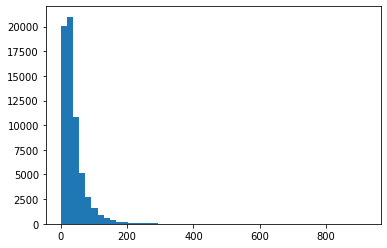

In [ ]:
import matplotlib.pyplot as plt
plt.hist(sent_lens, bins=50)

vast majority of sentences are between 0 and 100

**how long of a sentence covers 95% of the lengths?**

In [ ]:
output_seq_len = int(np.percentile(sent_lens, 95))
output_seq_len

104

apparently it's visible from the above output that 95 percent of the sentences has a length of 105 tokens or less.

when we will create the tokenization layer, we will use this value to turn all of our sentences into the same length. Meaning sentences with a length below 105 get padded with zeroes and sentences with a length above 105 get truncated (words after 105 get cut off)

In [ ]:
max(sent_lens)

918

In [ ]:
np.sum(sent_lens)

2513862

since hardly any sentence comes closer to the max length, it would mean the majority of data we pass to our model would be zeroes (since all sentences below the max length would get padded with zeroes), this is why we will not use the value of maximum sentence length for our tokenization process.

In [ ]:
# list = []
# for sentence in X_train:
#   for word in sentence.split():
#     if word in list:
#       continue
#     else:
#       list.append(word)

In [ ]:
# len(list) # our corpus has 34340 unique words

above cell has been commented because it takes a while to run and we only need the output once for our requirement.

our corpus has 34340 unique words

### creating text vectorization layer

In [ ]:
max_tokens = 35000  # how many words should be there in vocabulary

In [ ]:
# create text vectorizer
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

text_vectorizer = TextVectorization(max_tokens=max_tokens, # number of words in vocabulary
                                    output_sequence_length=105 ) # desired output length of vectorized sequences

In [ ]:
# Adapt text vectorizer to training sentences
text_vectorizer.adapt(X_train)

In [ ]:
# testing our text vectorizer
import random

target_sentence = random.choice(X_train)
print(f"original text: {target_sentence}")
print("\n")
print(f"original sentence: {text_vectorizer([target_sentence])}")

original text: admit realli yummi dont anyth realli yucki vegetarian famili find fruit snack without gelatin bovin sourc tough job find without hfcs artifici flavor artifici color even harder far tast qualiti great theyr realli expens year old could easili eat box day let could truth told box that pretti pricey quick snack doesnt offer real nutrit know qualiti ingredi cost jeez mayb offer bulk pack someth reduc price packag would bring cost bit


original sentence: [[ 1009    23   618    21   170    23  2377  1266   242    33   184   137
    138  1827 11751   666  1143   969    33   138  2182   353     5   353
    237    26  1516   167     3   110    16   301    23   215    57   118
     61   523    24    28    55   272    61  1897   541    28   197   174
   1042   219   137   107   379   173   455    56   110    68   228  8205
    202   379   636    72    78   861    30    39    12   676   228    92
      0     0     0     0     0     0     0     0     0     0     0     0
      0     

**how many words in our vocabulary?**

In [ ]:
text_vocab = text_vectorizer.get_vocabulary()
print(f"number of words in vocabulary: {len(text_vocab)}")
print(f"most common words in vocabulary: {text_vocab[:5]}")
print(f"least common words in vocabulary: {text_vocab[5:]}")

number of words in vocabulary: 31152
most common words in vocabulary: ['', '[UNK]', 'like', 'tast', 'product']
least common words in vocabulary: ['flavor', 'one', 'good', 'use', 'tri', 'coffe', 'love', 'would', 'get', 'tea', 'food', 'great', 'make', 'buy', 'amazon', 'order', 'dont', 'time', 'realli', 'eat', 'much', 'even', 'bag', 'box', 'dog', 'price', 'also', 'drink', 'find', 'look', 'littl', 'better', 'well', 'chocol', 'packag', 'ive', 'store', 'purchas', 'want', 'first', 'water', 'sugar', 'bought', 'review', 'mix', 'think', 'brand', 'best', 'made', 'give', 'day', 'know', 'year', 'sweet', 'way', 'say', 'could', 'cup', 'recommend', 'two', 'found', 'differ', 'thing', 'ingredi', 'work', 'got', 'bad', 'pack', 'treat', 'never', 'didnt', 'cat', 'still', 'someth', 'high', 'sinc', 'need', 'disappoint', 'smell', 'ship', 'stuff', 'mani', 'cant', 'lot', 'thought', 'come', 'bar', 'bit', 'enjoy', 'back', 'seem', 'receiv', 'cooki', 'take', 'contain', 'open', 'put', 'organ', 'nice', 'dri', 'milk', 

In [ ]:
# get the config of our text_vectorizer
text_vectorizer.get_config()

{'batch_input_shape': (None,),
 'dtype': 'string',
 'idf_weights': None,
 'max_tokens': 35000,
 'name': 'text_vectorization',
 'ngrams': None,
 'output_mode': 'int',
 'output_sequence_length': 105,
 'pad_to_max_tokens': False,
 'ragged': False,
 'sparse': False,
 'split': 'whitespace',
 'standardize': 'lower_and_strip_punctuation',
 'trainable': True,
 'vocabulary': None}

### creating custom text Embedding

to create a richer numerical representation of texts, we can use embedding.

as our model learns, it'll update the embeddings to better represent the relationship between tokens in our corpus

we can create a trainable embedding layer using Tensorflow's Embedding layer

The input_dim parameter defines the size of our vocabulary. And the output_dim parameter defines the dimension of the embedding output.

Once created, our embedding layer will take the integer outputs of our text_vectorization layer as inputs and convert them to feature vectors of size output_dim.

Embedding layer would take numerical output from the text vectorization layer as input and convert them to size output_dim. 

In [ ]:
# create token embedding layer
token_embed = layers.Embedding(input_dim = len(text_vocab),
                               output_dim = 128, # each token will be represented by a vector of size 128.
                               # use masking to handle variable sequence length (save space)
                               mask_zero=True,
                               name="token_embedding")

In [ ]:
# Show example embedding
print(f"Sentence before vectorization:\n{target_sentence}\n")
vectorized_sentence = text_vectorizer([target_sentence])
print(f"Sentence after vectorization (before embedding):\n{vectorized_sentence}\n")
embedded_sentence = token_embed(vectorized_sentence)
print(f"Sentence after embedding:\n{embedded_sentence}\n")
print(f"Embedded sentence shape: {embedded_sentence.shape}")

Sentence before vectorization:
admit realli yummi dont anyth realli yucki vegetarian famili find fruit snack without gelatin bovin sourc tough job find without hfcs artifici flavor artifici color even harder far tast qualiti great theyr realli expens year old could easili eat box day let could truth told box that pretti pricey quick snack doesnt offer real nutrit know qualiti ingredi cost jeez mayb offer bulk pack someth reduc price packag would bring cost bit

Sentence after vectorization (before embedding):
[[ 1009    23   618    21   170    23  2377  1266   242    33   184   137
    138  1827 11751   666  1143   969    33   138  2182   353     5   353
    237    26  1516   167     3   110    16   301    23   215    57   118
     61   523    24    28    55   272    61  1897   541    28   197   174
   1042   219   137   107   379   173   455    56   110    68   228  8205
    202   379   636    72    78   861    30    39    12   676   228    92
      0     0     0     0     0     0    

### pie chart regarding data points availablity

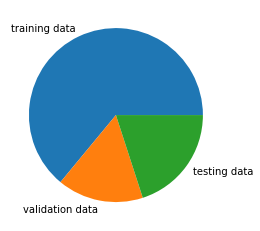

In [ ]:

plt.pie([64000,16000,20000],labels = ["training data","validation data","testing data"])
plt.show()

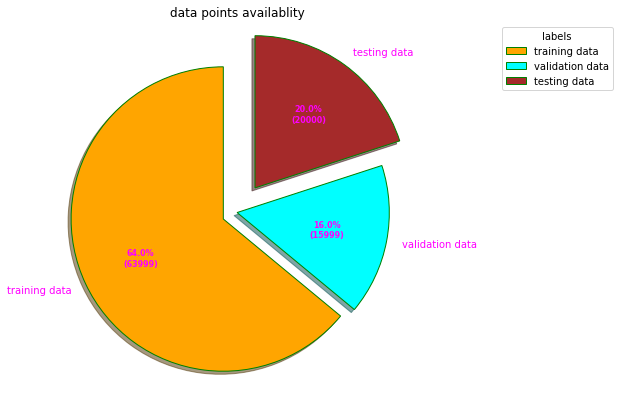

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
samples = ["training data","validation data","testing data"]

data = [64000,16000,20000]


# Creating explode data
explode = (0.1, 0.0, 0.2)

# Creating color parameters
colors = ( "orange", "cyan", "brown",
		"grey", "indigo", "beige")

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "green" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d})".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								explode = explode,
								labels = samples,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="magenta"))

# Adding legend
ax.legend(wedges, samples,
		title ="labels",
		loc ="bottom left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("data points availablity")

# show plot
plt.show()


# Data Input Pipeline

we have gone through the pre-processing steps to make our machine learning and deep learning models compatible with our data, however there are still few steps with which we can make our model training faster.

```tf.data``` API provides methods which enables faster data loading

### turn our dataset into tensorflow datasets

In [ ]:
y_train

array([1, 1, 0, ..., 1, 0, 1])

In [ ]:
y_test

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
X_train

array(['case dont know box store anyth pack worth great product though that star pancak pizza dough great make time',
       'sever year ago introduc tea bag local warehous club longer sell buy amazon brew instruct recommend steep bag quart boil hot water brew process complet remov tea bag add ice cool pour concentr plastic jug add water make full gallon store jug refriger state georgia alway ice tea home almost religi rite mother major one first gift gave equip household crockeri pitcher make tea year still use pitcher last lifetim care unlik glass shatter temperatur extrem metal saucepan add metal tast modern equival old crockeri pitcher fiesta pitcher www amazon com product larg disk pitcher perfect size process result small effort cost dramat less per gallon buy jug tea alreadi brew tea fresher tastier brew jug tea believ convinc wean even best brand tea',
       'like product perhap never one perhap need mix cook like nut tradion nut could eat one',
       ..., 'tast like kid glad

In [ ]:
X_test

array(['nice sturdi multipl use knew neighbor one use strain mani gallon cook syrup use wool dont substitut qualiti come food',
       'good thin light crisp chees flavor strong love chees especi parmesan youll love',
       'get bucket ball shown product photo get littl baggi four ball indic product featur seem good true arent',
       ...,
       'dont understand date fruit stamp best jan order feb what deal stale fruit ugh',
       'bacon flavor licketi stik like crack cocain dog rocki hand product would second howev arent suppos give dog licketi stick work like deodor human hold dog lick dog react like rocki youll get big kick novelti wont wear rocki distinct impress ill get bore paw peabodi seem enjoy wasnt enthusiast rocki could differ age six year old rocki one rocki also eat everyth includ light bulb styptic powder prescript eyewear much vigor attack licketi stik third dog chariti snif look like serious issu turn away shes seven base rocki enjoy product give five chariti dog wo

In [ ]:
import tensorflow as tf

In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

In [ ]:
train_dataset

<TensorSliceDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

### turn TensorSlicedDataset and turn them into Prefetched batches

In [ ]:
train_dataset = train_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

# functions for model performance evaluation

### Function to calculate f1_score

In [ ]:
def f1_score(precision, recall):
  """
  this function will take the precision and recall as parameters and will return the
  f1_score in percentage.
  """
  f1 = (2*precision*recall)/(precision+recall)
  
  return f1

###Function to evaluate: accuracy, precision, recall, f1-score

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.

  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array

  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

### defining our metrics for performance evaluation

In [ ]:
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

### compare two models based in their histories

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):
    """
    Compares two TensorFlow model History objects.
    
    Args:
      original_history: History object from original model (before new_history)
      new_history: History object from continued model training (after original_history)
      initial_epochs: Number of epochs in original_history (new_history plot starts from here) 
    """
    
    # Get original history measurements
    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    # Combine original history with new history
    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    # Make plots
    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

### Plot accuracy vs Loss curve

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object (see: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History)
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

### Confusion Matrix

In [ ]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False): 
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
    norm: normalize values or not (default=False).
    savefig: save confusion matrix to file (default=False).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

  # # Save the figure to the current working directory
  # if savefig:
  #   fig.savefig("confusion_matrix.png")

### ROC curve plot

In [ ]:
def roc_curve(y_true, y_pred):
  """
  this function will take actual labels and predicted labels and return the ROC curve 
  """
  from sklearn.metrics import roc_curve, auc

  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_true, y_pred)
  roc_auc = auc(false_positive_rate, true_positive_rate) 
  plt.figure(figsize=(10,8))
  plt.title("ROC curve")
  plt.plot(false_positive_rate, true_positive_rate, color="red", label = 'Area Under Curve = %0.2f' % roc_auc)
  plt.legend(loc='lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')

# MODEL 1 with token embedding

In [ ]:
# create 1-D convolutional model to process sequences
from keras import regularizers
inputs = layers.Input(shape=(1,), dtype=tf.string)
text_vectors = text_vectorizer(inputs) # vectorize text inputs
token_embeddings = token_embed(text_vectors) # create embedding
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(token_embeddings)
# introduced the regularization in the Dense layer below.
x = layers.Dense(8, activation="relu", kernel_regularizer=regularizers.l2(0.01))(x)
# x = layers.Dropout(0.5)(x) # will drop 50 percent of neurons at each pass
# x = layers.Dense(16, activation="relu")(x)
x = layers.GlobalAveragePooling1D()(x) # condense the output of our feature vector
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs)

# Compile
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=METRICS)

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 105)              0         
 torization)                                                     
                                                                 
 token_embedding (Embedding)  (None, 105, 128)         3987456   
                                                                 
 conv1d (Conv1D)             (None, 105, 64)           41024     
                                                                 
 dense (Dense)               (None, 105, 8)            520       
                                                                 
 global_average_pooling1d (G  (None, 8)                0         
 lobalAveragePooling1D)                                      

In [ ]:
# Fit the model
start = time.time()
model_1_history = model_1.fit(train_dataset,
                              steps_per_epoch=len(train_dataset),
                              epochs=5,
                              validation_data=val_dataset,
                              validation_steps=len(val_dataset))
end = time.time()
print(end-start)

Epoch 1/5
2000/2000 [==============================] - 33s 10ms/step - loss: 0.3907 - accuracy: 0.8446 - precision: 0.8253 - recall: 0.8745 - val_loss: 0.3269 - val_accuracy: 0.8743 - val_precision: 0.8668 - val_recall: 0.8830
Epoch 2/5
2000/2000 [==============================] - 19s 9ms/step - loss: 0.2838 - accuracy: 0.8947 - precision: 0.8927 - recall: 0.8974 - val_loss: 0.3261 - val_accuracy: 0.8741 - val_precision: 0.8657 - val_recall: 0.8840
Epoch 3/5
2000/2000 [==============================] - 17s 9ms/step - loss: 0.2470 - accuracy: 0.9096 - precision: 0.9084 - recall: 0.9113 - val_loss: 0.3432 - val_accuracy: 0.8704 - val_precision: 0.8587 - val_recall: 0.8851
Epoch 4/5
2000/2000 [==============================] - 17s 9ms/step - loss: 0.2185 - accuracy: 0.9204 - precision: 0.9190 - recall: 0.9221 - val_loss: 0.3709 - val_accuracy: 0.8673 - val_precision: 0.8550 - val_recall: 0.8830
Epoch 5/5
2000/2000 [==============================] - 17s 9ms/step - loss: 0.1946 - accuracy: 

In [ ]:
# get the embedding layer of the weight matrix which has been learnt over number of epochs
embed_weights = model_1.get_layer("token_embedding").get_weights()[0]
embed_weights, embed_weights.shape

(array([[-0.04912715, -0.04281633, -0.1159287 , ...,  0.03821962,
          0.15708256, -0.05260765],
        [-0.00874615, -0.03991828,  0.01256101, ...,  0.03353118,
         -0.03296851, -0.02828295],
        [ 0.07801282,  0.05673734,  0.01524409, ..., -0.06366196,
         -0.0189414 ,  0.01031631],
        ...,
        [-0.01000319,  0.00496107,  0.00963617, ...,  0.00290839,
          0.00425888,  0.0020433 ],
        [ 0.08642638, -0.05089756, -0.06211674, ...,  0.02361013,
         -0.00604131, -0.10265471],
        [ 0.11633792, -0.09946335, -0.11675267, ...,  0.13282672,
         -0.04050177, -0.04663422]], dtype=float32), (31152, 128))

In [ ]:
# # get vocabulary from our text vectorization layer
# words_in_vocab = text_vectorizer.get_vocabulary()

# len(words_in_vocab), print(words_in_vocab[:20])


In [ ]:
# import io
# out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
# out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

# for index, word in enumerate(words_in_vocab):
#   if index == 0:
#     continue  # skip 0, it's padding.
#   vec = embed_weights[index]
#   out_v.write('\t'.join([str(x) for x in vec]) + "\n")
#   out_m.write(word + "\n")
# out_v.close()
# out_m.close()

In [ ]:
# evaluate on whole test data
model_1.evaluate(val_dataset)

500/500 [==============================] - 2s 5ms/step - loss: 0.4014 - accuracy: 0.8654 - precision: 0.8561 - recall: 0.8768


[0.4013729393482208,
 0.8654375076293945,
 0.8560736179351807,
 0.8768380284309387]

In [ ]:
# model's performance evaluation on whole of the test dataset for later graph plotting use cases.
model_1_results = model_1.evaluate(test_dataset)

625/625 [==============================] - 3s 5ms/step - loss: 0.4087 - accuracy: 0.8605 - precision: 0.8543 - recall: 0.8700


In [ ]:
model_1_results

[0.4087102711200714, 0.8604999780654907, 0.854301393032074, 0.8699860572814941]

In [ ]:
# make prediction on test dataset
pred_prob_1 = model_1.predict(test_dataset)
pred_prob_1

array([[8.3365983e-01],
       [7.6784843e-01],
       [4.2799171e-03],
       ...,
       [9.8169362e-04],
       [9.9993896e-01],
       [9.9290061e-01]], dtype=float32)

In [ ]:
def pred(pred_prob):
  """
  this function will take the prediction probabilities and with the help of thresholding value of 0.5, 
  actual classes will be extracted.
  """
  y_pred = []
  for inner_list in pred_prob:
    if inner_list[0]>=0.5:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred

In [ ]:
y_pred_1 = pred(pred_prob_1)

In [ ]:
print(y_pred_1)

[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 

In [ ]:
model_1_score = calculate_results(y_test, y_pred_1)
model_1_score

{'accuracy': 86.05000000000001,
 'f1': 0.8604853673383394,
 'precision': 0.8606164533381386,
 'recall': 0.8605}

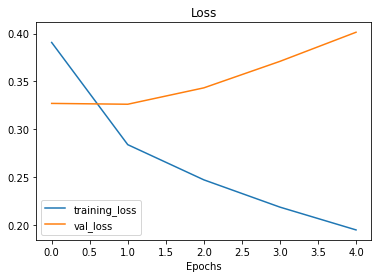

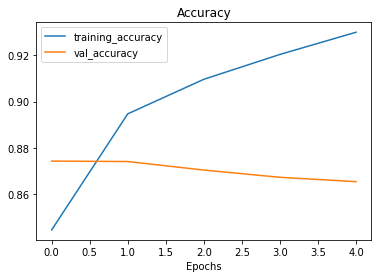

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
model_1_f1 = f1_score(model_1_history.history['val_precision'][-1], model_1_history.history['val_recall'][-1])
model_1_f1

0.8663314196267271

# MODEL 2: Feature Extraction with pre-trained token embedding

we will use the pre-trained token embedding layer from the Tensorflow hub

we will download a universal sentence encoder from Tensorflow hub, it takes care tokenization for us as well, therefore we will not use tokenization layer in our model.

The model structure would look like this:-

```Inputs (string) -> Pretrained embeddings from TensorFlow Hub (Universal Sentence Encoder) -> Layers -> Output (prediction probabilities)```

In [ ]:
# downloading the pre-trained embedding layer
import tensorflow_hub as hub
tf_hub_embedding_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        trainable=False, # we will use the already trained embedding values for our model training.
                                        name="universal_sentence_encoder")

In [ ]:
# let's test our downloaded embedding layer on a random sentence
import random
random_training_sentence = random.choice(X_train)
print(f"Random training sentence:\n{random_training_sentence}\n")
use_embedded_sentence = tf_hub_embedding_layer([random_training_sentence])
print(f"Sentence after embedding:\n{use_embedded_sentence} (truncated output)...\n")
print(f"Length of sentence embedding:\n{len(use_embedded_sentence[0])}")

Random training sentence:
order larg version field europ orang rose version flower close realli didnt want pink rose want pink rose would order bouquet instead hope someth realli pop summer springi love bouquet price send order make hope best ive order lot flower think find someon els disappoint someth cost would come look closer want

Sentence after embedding:
[[-6.31168783e-02 -6.44352064e-02  3.26319039e-03  6.11898787e-02
  -7.67873414e-03  5.65982535e-02  4.05769944e-02 -4.24740985e-02
  -6.00453578e-02 -5.82835227e-02  1.61126256e-02 -4.18896824e-02
   5.27294129e-02 -6.29682243e-02  1.49127040e-02  5.86493462e-02
   5.86805865e-02  4.66465428e-02  1.00601567e-02  2.78989710e-02
  -4.58663255e-02  5.79404384e-02  4.70693447e-02 -6.12007827e-02
   6.32721260e-02 -2.35436745e-02  4.55071442e-02 -2.63955314e-02
  -2.81170886e-02 -5.51243350e-02 -5.14599681e-02  1.70028035e-03
   4.12791632e-02  5.57406880e-02  6.26865476e-02 -1.29530160e-02
   5.60403392e-02  1.89596955e-02  5.86059

### Building and fitting a NLP feature extraction model using Tensorflow Hub

In [ ]:
inputs = layers.Input(shape=[], dtype=tf.string)
pretrained_embedding = tf_hub_embedding_layer(inputs) # will tokenize text and create embedding.
x = layers.Dense(128, activation="relu")(pretrained_embedding) # add a dense layer on top of our embedding layer
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = tf.keras.Model(inputs = inputs, outputs=outputs)

# compiling the model
model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(),
                metrics=METRICS)

In [ ]:
# fitting our model on the training data
start = time.time()
model_2_history = model_2.fit(train_dataset,
                              steps_per_epoch=len(train_dataset),
                              epochs=5,
                              validation_data=val_dataset,
                              validation_steps=len(val_dataset))
end = time.time()
print(end-start)

Epoch 1/5
2000/2000 [==============================] - 45s 21ms/step - loss: 0.4465 - accuracy: 0.8072 - precision: 0.8035 - recall: 0.8139 - val_loss: 0.4308 - val_accuracy: 0.7983 - val_precision: 0.7916 - val_recall: 0.8068
Epoch 2/5
2000/2000 [==============================] - 40s 20ms/step - loss: 0.4219 - accuracy: 0.8027 - precision: 0.8052 - recall: 0.7989 - val_loss: 0.4226 - val_accuracy: 0.8048 - val_precision: 0.8009 - val_recall: 0.8083
Epoch 3/5
2000/2000 [==============================] - 41s 21ms/step - loss: 0.4077 - accuracy: 0.8119 - precision: 0.8145 - recall: 0.8079 - val_loss: 0.4166 - val_accuracy: 0.8092 - val_precision: 0.8080 - val_recall: 0.8083
Epoch 4/5
2000/2000 [==============================] - 39s 20ms/step - loss: 0.3943 - accuracy: 0.8205 - precision: 0.8230 - recall: 0.8168 - val_loss: 0.4127 - val_accuracy: 0.8117 - val_precision: 0.8123 - val_recall: 0.8082
Epoch 5/5
2000/2000 [==============================] - 39s 20ms/step - loss: 0.3822 - accura

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None,)]                 0         
                                                                 
 universal_sentence_encoder   (None, 512)              256797824 
 (KerasLayer)                                                    
                                                                 
 dense_2 (Dense)             (None, 128)               65664     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 256,863,617
Trainable params: 65,793
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# Evaluate on whole validation dataset
model_2.evaluate(val_dataset)

500/500 [==============================] - 9s 19ms/step - loss: 0.4105 - accuracy: 0.8124 - precision: 0.8128 - recall: 0.8091


[0.4105309545993805, 0.812375009059906, 0.8127761483192444, 0.8090988993644714]

In [ ]:
# Make predictions with feature extraction model
pred_probs_2 = model_2.predict(test_dataset)
pred_probs_2

array([[0.96722364],
       [0.87530684],
       [0.22123864],
       ...,
       [0.10900591],
       [0.51125705],
       [0.95982504]], dtype=float32)

In [ ]:
y_pred_2 = pred(pred_probs_2)

In [ ]:
print(y_pred_2)

[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 

In [ ]:
model_2_results = model_2.evaluate(test_dataset)

625/625 [==============================] - 11s 18ms/step - loss: 0.3974 - accuracy: 0.8207 - precision: 0.8248 - recall: 0.8154


In [ ]:
model_2_results

[0.3974270224571228, 0.8206999897956848, 0.8247880339622498, 0.815406084060669]

In [ ]:
model_2_score = calculate_results(y_test, y_pred_2)
model_2_score

{'accuracy': 86.05000000000001,
 'f1': 0.8604853673383394,
 'precision': 0.8606164533381386,
 'recall': 0.8605}

In [ ]:
model_2_f1 = f1_score(model_2_history.history['val_precision'][-1], model_2_history.history['val_recall'][-1])
model_2_f1

0.8109333551607086

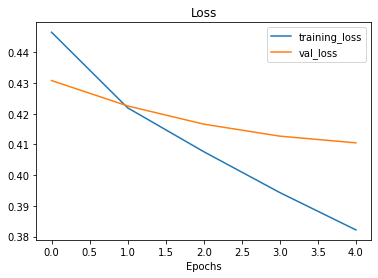

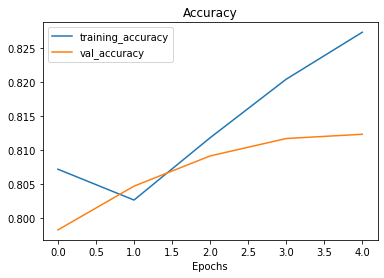

In [ ]:
plot_loss_curves(model_2_history)

# MODEL 3: Conv1D with character embedding

we have till now built model with pre-trained token embedding and custom token embedding layers. In this section we will build a model with character embedding.

character level embedding will convert each character of a token (which is of a sentence) into a feature vector of specified size.

In [ ]:
print(list(random_training_sentence))

['o', 'r', 'd', 'e', 'r', ' ', 'l', 'a', 'r', 'g', ' ', 'v', 'e', 'r', 's', 'i', 'o', 'n', ' ', 'f', 'i', 'e', 'l', 'd', ' ', 'e', 'u', 'r', 'o', 'p', ' ', 'o', 'r', 'a', 'n', 'g', ' ', 'r', 'o', 's', 'e', ' ', 'v', 'e', 'r', 's', 'i', 'o', 'n', ' ', 'f', 'l', 'o', 'w', 'e', 'r', ' ', 'c', 'l', 'o', 's', 'e', ' ', 'r', 'e', 'a', 'l', 'l', 'i', ' ', 'd', 'i', 'd', 'n', 't', ' ', 'w', 'a', 'n', 't', ' ', 'p', 'i', 'n', 'k', ' ', 'r', 'o', 's', 'e', ' ', 'w', 'a', 'n', 't', ' ', 'p', 'i', 'n', 'k', ' ', 'r', 'o', 's', 'e', ' ', 'w', 'o', 'u', 'l', 'd', ' ', 'o', 'r', 'd', 'e', 'r', ' ', 'b', 'o', 'u', 'q', 'u', 'e', 't', ' ', 'i', 'n', 's', 't', 'e', 'a', 'd', ' ', 'h', 'o', 'p', 'e', ' ', 's', 'o', 'm', 'e', 't', 'h', ' ', 'r', 'e', 'a', 'l', 'l', 'i', ' ', 'p', 'o', 'p', ' ', 's', 'u', 'm', 'm', 'e', 'r', ' ', 's', 'p', 'r', 'i', 'n', 'g', 'i', ' ', 'l', 'o', 'v', 'e', ' ', 'b', 'o', 'u', 'q', 'u', 'e', 't', ' ', 'p', 'r', 'i', 'c', 'e', ' ', 's', 'e', 'n', 'd', ' ', 'o', 'r', 'd', 'e',

In [ ]:
# let's make a function to split the characters in our sentence and test it on a random sampled data from the dataset.
def split_chars(text):
  return " ".join(list(text))

split_chars(random_training_sentence)

'o r d e r   l a r g   v e r s i o n   f i e l d   e u r o p   o r a n g   r o s e   v e r s i o n   f l o w e r   c l o s e   r e a l l i   d i d n t   w a n t   p i n k   r o s e   w a n t   p i n k   r o s e   w o u l d   o r d e r   b o u q u e t   i n s t e a d   h o p e   s o m e t h   r e a l l i   p o p   s u m m e r   s p r i n g i   l o v e   b o u q u e t   p r i c e   s e n d   o r d e r   m a k e   h o p e   b e s t   i v e   o r d e r   l o t   f l o w e r   t h i n k   f i n d   s o m e o n   e l s   d i s a p p o i n t   s o m e t h   c o s t   w o u l d   c o m e   l o o k   c l o s e r   w a n t'

**let's convert our training sentences, validation sentences and test sentences into desired format for character level embedding.**

In [ ]:
train_chars = [split_chars(sentence) for sentence in X_train]
val_chars = [split_chars(sentence) for sentence in X_val]
test_chars = [split_chars(sentence) for sentence in X_test]

In [ ]:
train_chars[:5]

['c a s e   d o n t   k n o w   b o x   s t o r e   a n y t h   p a c k   w o r t h   g r e a t   p r o d u c t   t h o u g h   t h a t   s t a r   p a n c a k   p i z z a   d o u g h   g r e a t   m a k e   t i m e',
 's e v e r   y e a r   a g o   i n t r o d u c   t e a   b a g   l o c a l   w a r e h o u s   c l u b   l o n g e r   s e l l   b u y   a m a z o n   b r e w   i n s t r u c t   r e c o m m e n d   s t e e p   b a g   q u a r t   b o i l   h o t   w a t e r   b r e w   p r o c e s s   c o m p l e t   r e m o v   t e a   b a g   a d d   i c e   c o o l   p o u r   c o n c e n t r   p l a s t i c   j u g   a d d   w a t e r   m a k e   f u l l   g a l l o n   s t o r e   j u g   r e f r i g e r   s t a t e   g e o r g i a   a l w a y   i c e   t e a   h o m e   a l m o s t   r e l i g i   r i t e   m o t h e r   m a j o r   o n e   f i r s t   g i f t   g a v e   e q u i p   h o u s e h o l d   c r o c k e r i   p i t c h e r   m a k e   t e a   y e a r   s t i l l   u s 

In [ ]:
# let's check the average character length
char_lens = [len(sentence) for sentence in train_chars]
mean_char_len = np.mean(char_lens)
mean_char_len

464.4318125

average character length is 930

In [ ]:
max(char_lens)

11387

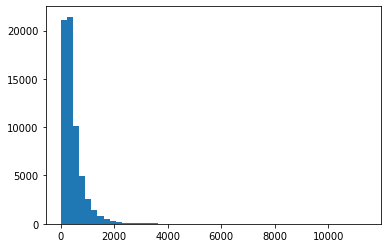

In [ ]:
# Check the distribution of our sequences at character-level
import matplotlib.pyplot as plt
plt.hist(char_lens, bins=50);

In [ ]:
# Find what character length covers 95% of sequences
output_seq_char_len = int(np.percentile(char_lens, 95))
output_seq_char_len

1235

95 percent of the sequences comes under 2481 or less length wise

In [ ]:
# Get all keyboard characters for char-level embedding
import string
alphabet = string.ascii_lowercase + string.digits + string.punctuation
alphabet

'abcdefghijklmnopqrstuvwxyz0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Create char-level token vectorizer instance
NUM_CHAR_TOKENS = len(alphabet) + 2 # num characters in alphabet + space + OOV token
char_vectorizer = TextVectorization(max_tokens=NUM_CHAR_TOKENS,  
                                    output_sequence_length=output_seq_char_len,
                                    standardize="lower_and_strip_punctuation",
                                    name="char_vectorizer")

# Adapt character vectorizer to training characters
char_vectorizer.adapt(train_chars)

In [ ]:
# Check character vocabulary characteristics
char_vocab = char_vectorizer.get_vocabulary()
print(f"Number of different characters in character vocab: {len(char_vocab)}")
print(f"5 most common characters: {char_vocab[:5]}")
print(f"5 least common characters: {char_vocab[-5:]}")

Number of different characters in character vocab: 33
5 most common characters: ['', '[UNK]', 'e', 't', 'a']
5 least common characters: ['ã', 'ç', 'î', 'â', 'û']


In [ ]:
# Test out character vectorizer
random_train_chars = random.choice(train_chars)
print(f"Charified text:\n{random_train_chars}")
print(f"\nLength of chars: {len(random_train_chars.split())}")
vectorized_chars = char_vectorizer([random_train_chars])
print(f"\nVectorized chars:\n{vectorized_chars}")
print(f"\nLength of vectorized chars: {len(vectorized_chars[0])}")

Charified text:
e x c i t   p o s s i b l   o r d e r   l a v a z z a   v i a   a m a z o n   u n f o r t u n   c o f f e   d o e s n t   m e a s u r   u s e   l a v a z z a   s h o p   g r a n t   t y p i c   e s p r e s s o   b a s e   d r i n k   c o f f e   a c c p e t   e v e n   e v e r i   d a y   c o f f e   b a c k   l o c a l   f r e s h   r o a s t   b e a n   s i x   b a g   s t o r a g   e m e r g   c o f f e   r u n   u n e x p e c t

Length of chars: 183

Vectorized chars:
[[ 2 24 11 ...  0  0  0]]

Length of vectorized chars: 1235


You'll notice sequences with a length shorter than 290 (output_seq_char_length) get padded with zeros on the end, this ensures all sequences passed to our model are the same length.

Also, due to the standardize parameter of TextVectorization being "lower_and_strip_punctuation" and the split parameter being "whitespace" by default, symbols (such as @) and spaces are removed.

### Character level embedding

We've got a way to vectorize our character-level sequences, now's time to create a character-level embedding.

Just like our custom token embedding, we can do so using the ```tensorflow.keras.layers.Embedding``` class.

Our character-level embedding layer requires an input dimension and output dimension.

In [ ]:
# Create char embedding layer
char_embed = layers.Embedding(input_dim=NUM_CHAR_TOKENS, # number of different characters
                              output_dim=25, # embedding dimension of each character 
                              mask_zero=False,
                              name="char_embed")

# Test out character embedding layer
print(f"Charified text (before vectorization and embedding):\n{random_train_chars}\n")
char_embed_example = char_embed(char_vectorizer([random_train_chars]))
print(f"Embedded chars (after vectorization and embedding):\n{char_embed_example}\n")
print(f"Character embedding shape: {char_embed_example.shape}")

Charified text (before vectorization and embedding):
e x c i t   p o s s i b l   o r d e r   l a v a z z a   v i a   a m a z o n   u n f o r t u n   c o f f e   d o e s n t   m e a s u r   u s e   l a v a z z a   s h o p   g r a n t   t y p i c   e s p r e s s o   b a s e   d r i n k   c o f f e   a c c p e t   e v e n   e v e r i   d a y   c o f f e   b a c k   l o c a l   f r e s h   r o a s t   b e a n   s i x   b a g   s t o r a g   e m e r g   c o f f e   r u n   u n e x p e c t

Embedded chars (after vectorization and embedding):
[[[-1.4585387e-02 -4.9876522e-02  3.7791852e-02 ...  2.7078059e-02
   -2.9264593e-02  3.5283994e-02]
  [ 1.8645078e-05 -4.3147147e-02 -2.6273323e-02 ... -2.3301650e-02
   -4.5537222e-02  1.6602587e-02]
  [-3.7259329e-02  6.8248622e-03  4.9985919e-02 ... -4.7780812e-02
    1.4156792e-02 -1.7537929e-02]
  ...
  [ 1.6077150e-02  1.5136603e-02  2.6306752e-02 ... -1.7401766e-02
    3.3415366e-02 -2.0820832e-02]
  [ 1.6077150e-02  1.5136603e-02  2.6306752e-02 

```Input (character-level text) -> Tokenize -> Embedding -> Layers (Conv1D, GlobalMaxPool1D) -> Output (label probability)```

In [ ]:
# Make Conv1D on chars only
inputs = layers.Input(shape=(1,), dtype="string")
char_vectors = char_vectorizer(inputs)
char_embeddings = char_embed(char_vectors)
x = layers.Conv1D(64, kernel_size=5, padding="same", activation="relu")(char_embeddings)
x = layers.GlobalMaxPooling1D()(x)
x = layers.Dense(32, activation="relu")(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs=inputs,
                         outputs=outputs,
                         name="model_3_conv1D_char_embedding")

# Compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=METRICS)

In [ ]:
# Check the summary of conv1d_char_model
model_3.summary()

Model: "model_3_conv1D_char_embedding"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 char_vectorizer (TextVector  (None, 1235)             0         
 ization)                                                        
                                                                 
 char_embed (Embedding)      (None, 1235, 25)          1750      
                                                                 
 conv1d_1 (Conv1D)           (None, 1235, 64)          8064      
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense_4 (Dense)             (None, 3

In [ ]:
# Create char datasets
train_char_dataset = tf.data.Dataset.from_tensor_slices((train_chars, y_train)).batch(32).prefetch(tf.data.AUTOTUNE)
val_char_dataset = tf.data.Dataset.from_tensor_slices((val_chars, y_val)).batch(32).prefetch(tf.data.AUTOTUNE)
test_char_dataset = tf.data.Dataset.from_tensor_slices((test_chars, y_test)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_char_dataset, val_char_dataset

(<PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=(TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
# Fit the model on chars only
start = time.time()
model_3_history = model_3.fit(train_char_dataset,
                              steps_per_epoch=len(train_char_dataset),
                              epochs=3,
                              validation_data=val_char_dataset,
                              validation_steps=len(val_char_dataset))
end = time.time()
print(end-start)

Epoch 1/3
2000/2000 [==============================] - 19s 9ms/step - loss: 0.4844 - accuracy: 0.7737 - precision: 0.7691 - recall: 0.7830 - val_loss: 0.4103 - val_accuracy: 0.8095 - val_precision: 0.8398 - val_recall: 0.7623
Epoch 2/3
2000/2000 [==============================] - 17s 9ms/step - loss: 0.3958 - accuracy: 0.8208 - precision: 0.8215 - recall: 0.8200 - val_loss: 0.3885 - val_accuracy: 0.8246 - val_precision: 0.8458 - val_recall: 0.7918
Epoch 3/3
2000/2000 [==============================] - 17s 8ms/step - loss: 0.3720 - accuracy: 0.8330 - precision: 0.8348 - recall: 0.8306 - val_loss: 0.3825 - val_accuracy: 0.8260 - val_precision: 0.8466 - val_recall: 0.7940
56.3089964389801


In [ ]:
# Evaluate model_3 on whole test char dataset
model_3_results = model_3.evaluate(test_char_dataset)

625/625 [==============================] - 4s 6ms/step - loss: 0.3900 - accuracy: 0.8227 - precision: 0.8448 - recall: 0.7916


In [ ]:
model_3_results

[0.39002132415771484, 0.822700023651123, 0.8448349237442017, 0.791558563709259]

In [ ]:
# Make predictions with character model only
model_3_pred_probs = model_3.predict(test_char_dataset)
model_3_pred_probs

array([[0.4687125 ],
       [0.9940043 ],
       [0.32594505],
       ...,
       [0.38385445],
       [0.2505949 ],
       [0.9923206 ]], dtype=float32)

In [ ]:
# Convert predictions to classes
y_pred_3 = pred(model_3_pred_probs)
print(y_pred_3)

[1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 

In [ ]:
model_3_f1 = f1_score(model_3_history.history['val_precision'][-1], model_3_history.history['val_recall'][-1])
model_3_f1

0.8194552597765632

In [ ]:
# Calculate Conv1D char only model results
model_3_score = calculate_results(y_true=y_test,
                                        y_pred=y_pred_3)
model_3_score

{'accuracy': 86.05000000000001,
 'f1': 0.8604853673383394,
 'precision': 0.8606164533381386,
 'recall': 0.8605}

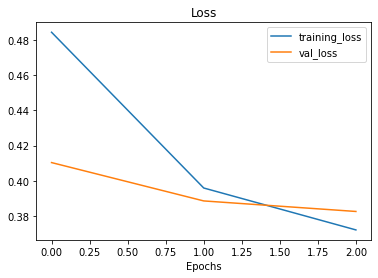

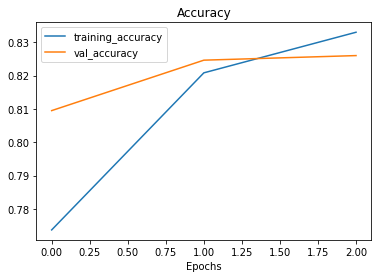

In [ ]:
plot_loss_curves(model_3_history)

# MODEL 4: Combining Pretrained token embeddings + Character embeddings (hybrid embedding layer)

The hybrid token embedding is a combination of token embeddings and character embeddings.

till now, what we have done is that, we have used token embedding and character embedding exclusively for all these models, now what we are going to do is, we will create ```stacked embeddings```

steps to be followed:-

1. create a token level model
2. create a character level model
3. combine the outputs of 1 and 2
4. Build a series of output layers on top of 3
5. construct a model which takes character level and token level sequence as input and produces sequence level probabilities as output.

In [ ]:
# 1. setup token level model
token_inputs = layers.Input(shape=[], dtype=tf.string, name="token_input")
token_embeddings = tf_hub_embedding_layer(token_inputs)
token_output = layers.Dense(128, activation="relu")(token_embeddings)
token_model = tf.keras.Model(inputs=token_inputs, outputs=token_output)

# 2. setup character level model
char_inputs = layers.Input(shape=[], dtype=tf.string, name="char_input")
char_vectors = char_vectorizer(char_inputs)
char_embeddings = char_embed(char_vectors)
char_bi_lstm = layers.Bidirectional(layers.LSTM(25))(char_embeddings) 
char_model = tf.keras.Model(inputs=char_inputs, outputs=char_bi_lstm)

# 3. concatenate character level model output and token level model output
token_char_concat = layers.Concatenate(name="token_char_hybrid")([token_model.output,
                                                                  char_model.output])

# 4. create output layers
combined_dropout = layers.Dropout(0.5)(token_char_concat)
combined_dense = layers.Dense(200, activation="relu")(combined_dropout)
final_dropout = layers.Dropout(0.5)(combined_dense)
output_layer = layers.Dense(1, activation="sigmoid")(final_dropout)

# 5. construct model with char and token inputs
model_4 = tf.keras.Model(inputs = [token_model.input, char_model.input],
                         outputs = output_layer,
                         name = "model_4_token_and_char_embedding")

In [ ]:
model_4.summary()

Model: "model_4_token_and_char_embedding"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 char_input (InputLayer)        [(None,)]            0           []                               
                                                                                                  
 token_input (InputLayer)       [(None,)]            0           []                               
                                                                                                  
 char_vectorizer (TextVectoriza  (None, 1235)        0           ['char_input[0][0]']             
 tion)                                                                                            
                                                                                                  
 universal_sentence_encoder (Ke  (None, 512)         256797824   ['

In [ ]:
# compiling the model
model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=METRICS)

### plot hybird token and character level model

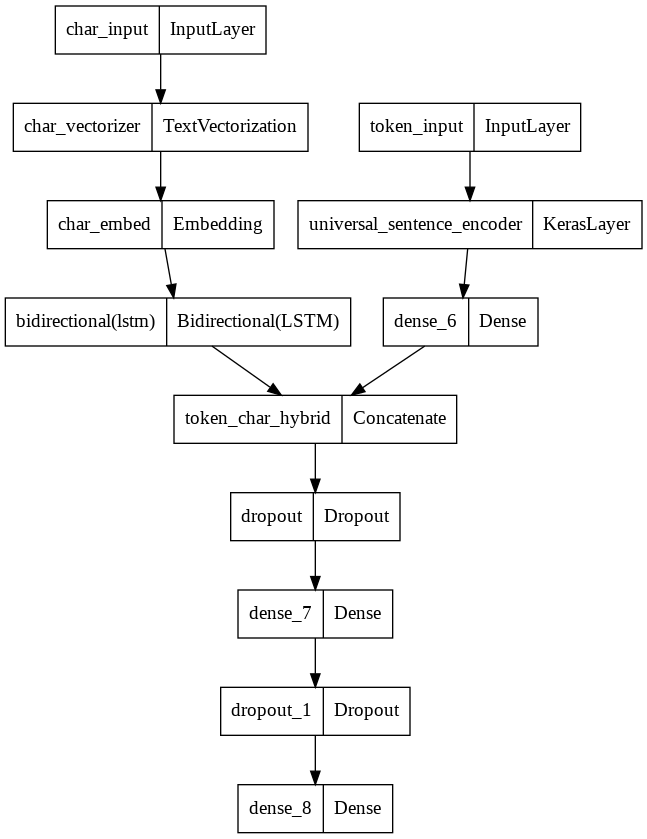

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model_4)

### Combining Token and Character data into a ```tf.data``` dataset

this model requires two inputs, character level sequence and token level sequence

required data format - ```((token_data, character_data),(label))```

In [ ]:
# combining tokens and characters into dataset
train_char_token_data = tf.data.Dataset.from_tensor_slices((X_train, train_chars)) # make data
train_char_token_labels = tf.data.Dataset.from_tensor_slices(y_train) # make labels
train_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels
# Prefetch and batch train data
train_char_token_dataset = train_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

# repeat above step for validation dataset and test dataset
val_char_token_data = tf.data.Dataset.from_tensor_slices((X_val, val_chars)) # make data
val_char_token_labels = tf.data.Dataset.from_tensor_slices(y_val) # make labels
val_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels
# Prefetch and batch val data
val_char_token_dataset = val_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

test_char_token_data = tf.data.Dataset.from_tensor_slices((X_test, test_chars)) # make data
test_char_token_labels = tf.data.Dataset.from_tensor_slices(y_test) # make labels
test_char_token_dataset = tf.data.Dataset.zip((train_char_token_data, train_char_token_labels)) # combine data and labels
# Prefetch and batch test data
test_char_token_dataset = test_char_token_dataset.batch(32).prefetch(tf.data.AUTOTUNE) 

In [ ]:
# Check out training char and token embedding dataset
train_char_token_dataset, val_char_token_dataset

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
# Fit the model on training data
start = time.time()
model_4_history = model_4.fit(train_char_token_dataset,
                              steps_per_epoch=len(train_char_token_dataset),
                              epochs=20,
                              validation_data=val_char_token_dataset,
                              validation_steps=len(val_char_token_dataset))
end = time.time()
print(end-start)

Epoch 1/20
2000/2000 [==============================] - 260s 127ms/step - loss: 0.4588 - accuracy: 0.7925 - precision: 0.7946 - recall: 0.7895 - val_loss: 0.4134 - val_accuracy: 0.8078 - val_precision: 0.8142 - val_recall: 0.7981
Epoch 2/20
2000/2000 [==============================] - 255s 127ms/step - loss: 0.4272 - accuracy: 0.8020 - precision: 0.8045 - recall: 0.7981 - val_loss: 0.3981 - val_accuracy: 0.8184 - val_precision: 0.8304 - val_recall: 0.8004
Epoch 3/20
2000/2000 [==============================] - 256s 128ms/step - loss: 0.4155 - accuracy: 0.8112 - precision: 0.8135 - recall: 0.8078 - val_loss: 0.3837 - val_accuracy: 0.8280 - val_precision: 0.8332 - val_recall: 0.8205
Epoch 4/20
2000/2000 [==============================] - 257s 128ms/step - loss: 0.4039 - accuracy: 0.8165 - precision: 0.8190 - recall: 0.8129 - val_loss: 0.3717 - val_accuracy: 0.8353 - val_precision: 0.8362 - val_recall: 0.8342
Epoch 5/20
2000/2000 [==============================] - 255s 127ms/step - loss: 

In [ ]:
model_4_history.history['val_accuracy'][-1]

0.8960156440734863

In [ ]:
# model's performance evalutation on whole test data set, results are stored in a variable for later use for graph plotting.
model_4_results = model_4.evaluate(test_char_token_dataset)

2000/2000 [==============================] - 98s 49ms/step - loss: 0.2598 - accuracy: 0.8960 - precision: 0.8962 - recall: 0.8959


In [ ]:
model_4_results

[0.2597934901714325,
 0.8960156440734863,
 0.8962199091911316,
 0.8959120512008667]

In [ ]:
model_4_pred_prob = model_4.predict(test_char_token_dataset)
model_4_pred_prob

array([[0.88538504],
       [0.71857584],
       [0.34488234],
       ...,
       [0.9651109 ],
       [0.00489563],
       [0.8881525 ]], dtype=float32)

In [ ]:
model_4_pred_prob.shape

(64000, 1)

In [ ]:
y_pred_4 = pred(model_4_pred_prob)

In [ ]:
len(y_pred_4)

64000

In [ ]:
print(y_pred_4)

[1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 

In [ ]:
model_4_score = calculate_results(y_test, y_pred_4)
model_4_score

ValueError: ignored

In [ ]:
plot_loss_curves(model_4_history)

In [ ]:
make_confusion_matrix(y_test, y_pred_4)

In [ ]:
model_4_f1 = f1_score(model_4_history.history['val_precision'][-1], model_4_history.history['val_recall'][-1])
model_4_f1

# ROC curve comparison graph

In [ ]:
# plt.figure(figsize=(10,8))
# from sklearn.metrics import roc_curve, auc

# false_positive_rate_1, true_positive_rate_1, thresholds_1 = roc_curve(y_test, y_pred_1)
# roc_auc_1 = auc(false_positive_rate_1, true_positive_rate_1) 

# false_positive_rate_2, true_positive_rate_2, thresholds_2 = roc_curve(y_test, y_pred_2)
# roc_auc_2 = auc(false_positive_rate_2, true_positive_rate_2)

# false_positive_rate_3, true_positive_rate_3, thresholds_3 = roc_curve(y_test, y_pred_3)
# roc_auc_3 = auc(false_positive_rate_3, true_positive_rate_3) 

# false_positive_rate_4, true_positive_rate_4, thresholds_4 = roc_curve(y_test, y_pred_4)
# roc_auc_4 = auc(false_positive_rate_4, true_positive_rate_4)

# plt.plot(false_positive_rate_1, true_positive_rate_1, label = 'Model 1 = %0.2f' % roc_auc_1 )
# plt.plot(false_positive_rate_2, true_positive_rate_2, label = 'Model 2 = %0.2f' % roc_auc_2 )
# plt.plot(false_positive_rate_3, true_positive_rate_3, label = 'Model 3 = %0.2f' % roc_auc_3 )
# plt.plot(false_positive_rate_4, true_positive_rate_4, label = 'Model 4 = %0.2f' % roc_auc_4 )
# plt.legend()
# plt.show()

# Models performance comparison on test dataset

In [ ]:
print(model_1_results, model_2_results, model_3_results, model_4_results)

In [ ]:
# model_1_accuracy = model_1_results[1]
# model_2_accuracy = model_2_results[1]
# model_3_accuracy = model_3_results[1]
# model_4_accuracy = model_4_results[1]

plt.figure(figsize=(10,8))

result_dict = {
    "model_1_accuracy": model_1_results[1],
    "model_2_accuracy": model_2_results[1],
    "model_3_accuracy": model_3_results[1],
    "model_4_accuracy": model_4_results[1]
}

plt.bar(result_dict.keys(), result_dict.values())
plt.title("models performance comparison on test dataset")
plt.ylim(0.5)
plt.xlabel("models")
plt.ylabel("accuracy on test dataset")
plt.show()

# Models f1_score comparison on validation dataset

In [ ]:
f1_dict = {
    "model_1": model_1_f1,
    "model_2": model_2_f1,
    "model_3": model_3_f1,
    "model_4": model_4_f1
}

plt.figure(figsize=(10,8))
plt.bar(f1_dict.keys(), f1_dict.values())
plt.ylim(0.5)
plt.xlabel("models")
plt.ylabel("f1_score")
plt.title("model's f1_score comparison graph on validation dataset")
plt.show()

In [ ]:
len(y_test)

In [ ]:
len(y_pred_4)

In [ ]:
print(y_test)

In [ ]:
print(y_pred_4)

In [ ]:
matching_count = 0
for i in range(20000):
  if y_test[i]==y_pred_4[i]:
    matching_count = matching_count + 1
print(matching_count)

In [ ]:
print(17210/20000) # accuracy

In [ ]:
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_4)
roc_auc = auc(false_positive_rate, true_positive_rate) 

plt.plot(false_positive_rate, true_positive_rate, label = 'Area Under Curve = %0.2f' % roc_auc)
plt.legend()
plt.show()